# 2. Exploratory Data Analysis

## 2.1 Load Dataset
---
The following code will load in the filtered dataset from `filtered_reviews.csv`.

In [1]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define project paths
project_dir = '/content/drive/MyDrive/bt4222_group_6/bt4222_group_6_amazon'
data_dir = '/content/drive/MyDrive/bt4222_group_6/bt4222_group_6_amazon/data'

df_reviews = pd.read_csv(os.path.join(data_dir, 'filtered_reviews.csv'))

Mounted at /content/drive


## 2.2 Inspect Dataset

In [2]:
print(df_reviews.columns.tolist())

['customer_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']


In [3]:
df_reviews.head()

,customer_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,24133606,B008G80FHQ,182455922,Ear Receiver Ex220lp Mdr-ex220lp Sealed Sony [...,Electronics,4,3,3,N,Y,Growing on me...buy these while you still can!!!,I really think these are a steal! The bass is ...,2015-08-31
1,33174505,B00931SFZO,132469335,Sony PHA-1 Headphone Amp,Electronics,4,0,1,N,Y,"Try ""Portable"" Amp",This is a GREAT &#34;portable&#34; dac/amp. Th...,2015-08-31
2,53023463,B008J26ZL4,481188504,FiiO E09K High Output Desktop Headphone Amplif...,Electronics,5,0,0,N,Y,Five Stars,"great headphone amplifier, especially when mat...",2015-08-31
3,44552918,B007PPZXU0,925981077,uxcell 2 Pcs F Female to PAL Male 9.5mm TV Sat...,Electronics,5,0,0,N,Y,Five Stars,great part thank,2015-08-31
4,16255502,B00HZV9TGS,517311917,AmazonBasics High Capacity Ni-MH Pre-Charged R...,Electronics,5,1,1,N,Y,GREAT BATTERIES!!,Great rechargeable batteries!! I have been usi...,2015-08-31


In [ ]:
df_reviews.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,3.370290e+05,3.370290e+05,337029.000000,337029.000000,337029.000000
mean,2.987036e+07,5.087697e+08,4.377591,1.306140,1.595679
std,1.470876e+07,2.865826e+08,1.082505,15.060581,15.785099
min,1.196000e+04,4.837000e+03,1.000000,0.000000,0.000000
25%,1.613520e+07,2.594828e+08,4.000000,0.000000,0.000000
50%,2.942165e+07,5.093264e+08,5.000000,0.000000,0.000000
75%,4.361990e+07,7.566356e+08,5.000000,1.000000,1.000000
max,5.309636e+07,9.999911e+08,5.000000,3287.000000,3369.000000


In [4]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337029 entries, 0 to 337028
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   customer_id        337029 non-null  int64 
 1   product_id         337029 non-null  object
 2   product_parent     337029 non-null  int64 
 3   product_title      337029 non-null  object
 4   product_category   337029 non-null  object
 5   star_rating        337029 non-null  int64 
 6   helpful_votes      337029 non-null  int64 
 7   total_votes        337029 non-null  int64 
 8   vine               337029 non-null  object
 9   verified_purchase  337029 non-null  object
 10  review_headline    337026 non-null  object
 11  review_body        337029 non-null  object
 12  review_date        337029 non-null  object
dtypes: int64(5), object(8)
memory usage: 33.4+ MB


In [5]:
df_reviews.shape

(337029, 13)

In [6]:
df_reviews.isnull().sum()

# can drop the 258 rows with missing review_body

,0
customer_id,0
product_id,0
product_parent,0
product_title,0
product_category,0
star_rating,0
helpful_votes,0
total_votes,0
vine,0
verified_purchase,0


In [7]:
df_no_review_header_body = df_reviews[df_reviews['review_headline'].isna() & df_reviews['review_body'].isna()]
num_no_review_header_body = df_no_review_header_body.shape[0]

print(f"Number of reviews with no review_headline and no review_body: {num_no_review_header_body}")

Number of reviews with no review_headline and no review_body: 0


In [8]:
# unique values for each column
df_reviews.apply(lambda col: col.nunique() if col.apply(lambda x: isinstance(x, (str, int, float, bool, type(None)))).all() else 'unhashable')

,0
customer_id,47649
product_id,73914
product_parent,63260
product_title,63146
product_category,4
star_rating,5
helpful_votes,316
total_votes,323
vine,2
verified_purchase,1


## 2.3 Data Visualisation

### Distribution of Star Ratings

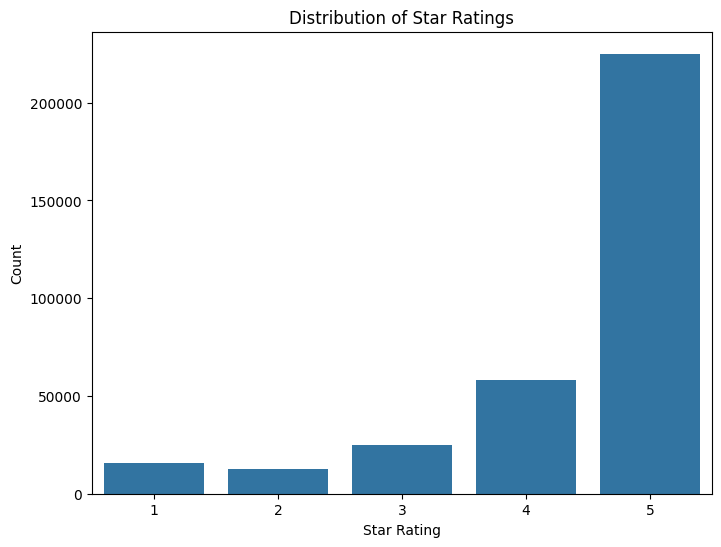

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='star_rating', data=df_reviews)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

The bar chart shows a left-skewed distribution of star ratings, with the vast majority of reviews receiving the maximum rating of 5 stars. This indicates that customers overwhelmingly leave highly positive feedback, while lower ratings (1 to 3 stars) are comparatively rare.

The pattern suggests a generally satisfied user base, though it may also reflect rating inflation or bias, where users are more likely to leave positive reviews. This skew highlights the importance of incorporating additional sentiment signals such as review text or helpfulness scores to gain a fuller understanding of user satisfaction.

### Distribution of Helpful Votes

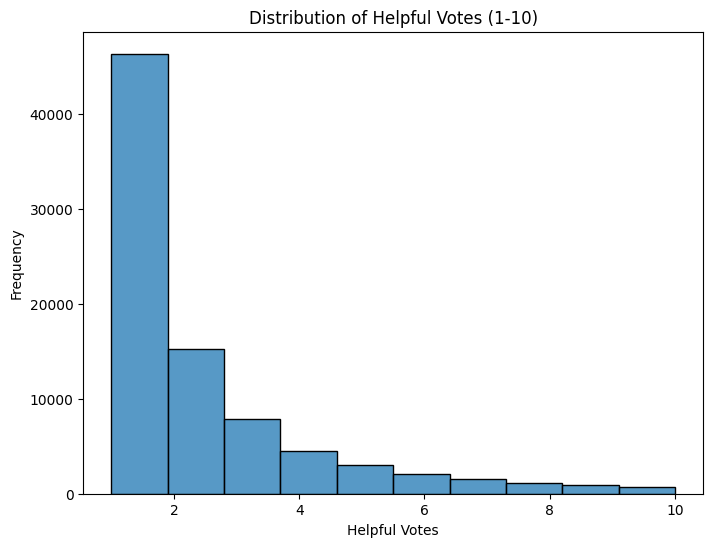

In [11]:
# Filter helpful votes to include only values between 1 and 10
filtered_helpful_votes = df_reviews[(df_reviews['helpful_votes'] >= 1) & (df_reviews['helpful_votes'] <= 10)]
plt.figure(figsize=(8, 6))
sns.histplot(filtered_helpful_votes['helpful_votes'], bins=10)
plt.title('Distribution of Helpful Votes (1-10)')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()

The histogram shows a right-skewed distribution of helpful votes, where the majority of reviews receive only 1 or 2 helpful votes, and the frequency steadily declines as the number of helpful votes increases.

This suggests that while many customers leave reviews, only a small subset of them are perceived as highly helpful by others. The long tail toward higher vote counts indicates that a few reviews stand out significantly in terms of usefulness, possibly due to their depth, clarity, or relevance. This pattern highlights the importance of factoring in helpfulness scores when assessing review quality or identifying influential customers.

### Product Category Distribution

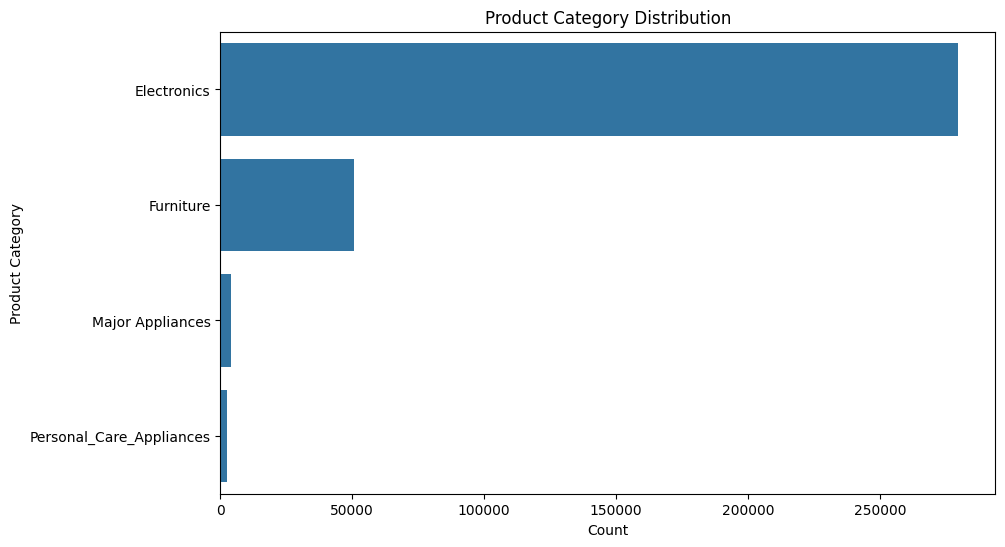

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category', data=df_reviews, order=df_reviews['product_category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

The horizontal bar chart illustrates the distribution of reviews across different product categories. It reveals a highly imbalanced dataset, with the Electronics category dominating by a large margin, followed by Furniture. In contrast, categories like Major Appliances and Personal Care Appliances have significantly fewer entries. This indicates that user activity and engagement are heavily skewed towards electronics.

### Number of reviews across time

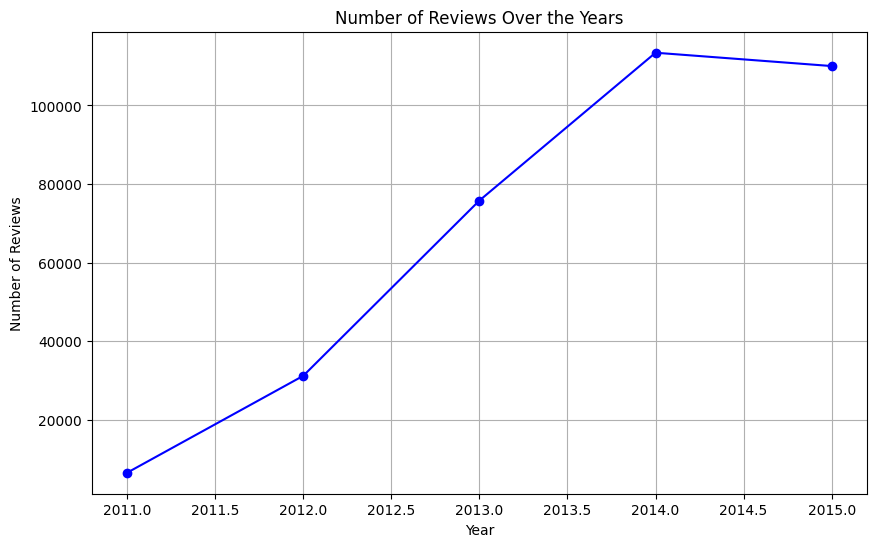

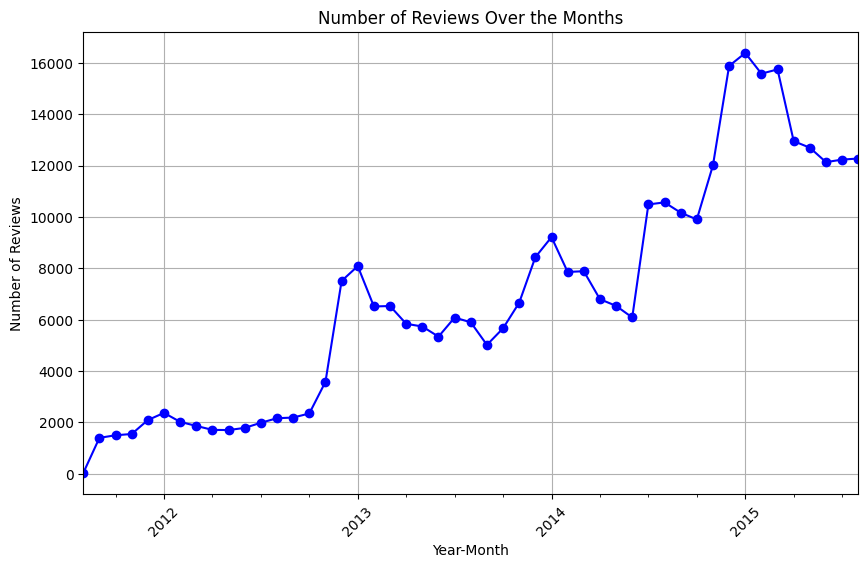

In [14]:
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'], errors='coerce')
df_reviews['review_year'] = df_reviews['review_date'].dt.year
reviews_per_year = df_reviews.groupby('review_year').size()

plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Reviews Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

df_reviews['year_month'] = df_reviews['review_date'].dt.to_period('M')
reviews_per_month = df_reviews.groupby('year_month').size()

plt.figure(figsize=(10, 6))
reviews_per_month.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Reviews Over the Months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The line chart at the top displays the number of reviews submitted each year from 2011 to 2015. There is a clear upward trend from 2011 to 2014, indicating steady growth in user engagement and platform activity over time. The number of reviews peaked in 2014, followed by a slight decline in 2015. This pattern may reflect increasing user adoption and product availability in the early years. Overall, the chart highlights the platform's rapid growth phase and the need to account for time-based dynamics in modeling user activity.

The line chart at the bottom illustrates the monthly trend in the number of reviews from 2011 to 2015. The data reveals a clear upward trajectory over time, punctuated by recurring spikes and dips, which could be suggesting seasonal or event-driven review activity. There are sharp increases around late 2012, late 2013, and particularly late 2014, possibly corresponding to holiday seasons like christmas and new year. The sustained peak in 2015 indicates a period of high user engagement. This temporal pattern further emphasizes the importance of factoring in time-based dynamics when building recommendation models.

### Number of Verified Purchases across time

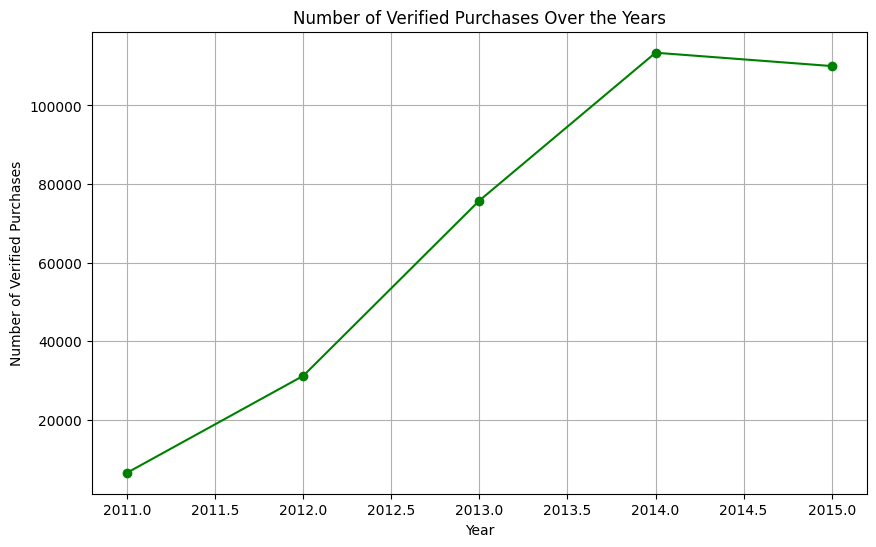

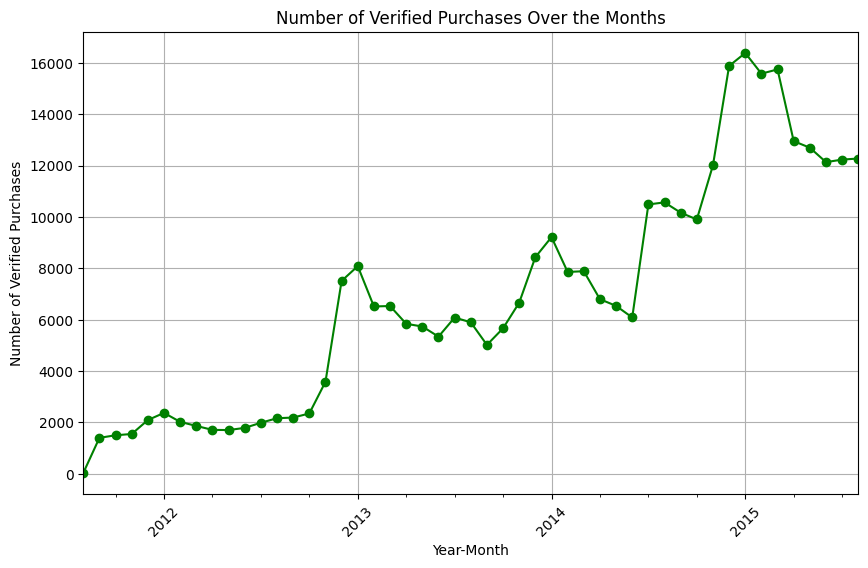

In [16]:
df_verified_purchases = df_reviews[df_reviews['verified_purchase'] == 'Y']
df_verified_purchases['review_year'] = df_verified_purchases['review_date'].dt.year
purchases_per_year = df_verified_purchases.groupby('review_year').size()

plt.figure(figsize=(10, 6))
purchases_per_year.plot(kind='line', marker='o', linestyle='-', color='g')
plt.title('Number of Verified Purchases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Verified Purchases')
plt.grid(True)
plt.show()

df_verified_purchases['year_month'] = df_verified_purchases['review_date'].dt.to_period('M')
purchases_per_month = df_verified_purchases.groupby('year_month').size()

plt.figure(figsize=(10, 6))
purchases_per_month.plot(kind='line', marker='o', linestyle='-', color='g')
plt.title('Number of Verified Purchases Over the Months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Verified Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The trend of the number of verified purchases over the months and years is similar to that of the number of reviews across time.

### Product and User Review Frequency

In [17]:
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'])
df_reviews['year_month'] = df_reviews['review_date'].dt.to_period('M')

# user review frequency for each month
user_reviews_frequency = df_reviews.groupby(['customer_id', 'year_month']).size().reset_index(name='monthly_reviews')
user_reviews_frequency_pivot = user_reviews_frequency.pivot(index='customer_id', columns='year_month', values='monthly_reviews')
user_reviews_frequency_pivot = user_reviews_frequency_pivot.fillna(0)
user_reviews_frequency_pivot['monthly_reviews_frequency'] = user_reviews_frequency_pivot.mean(axis=1)
print("User reviews frequency (each month as columns, with avg):")
print(user_reviews_frequency_pivot)

# frequency of product being reviews for each month
product_reviews_frequency = df_reviews.groupby(['product_id', 'year_month']).size().reset_index(name='monthly_reviews_per_product')
product_reviews_frequency_pivot = product_reviews_frequency.pivot(index='product_id', columns='year_month', values='monthly_reviews_per_product')
product_reviews_frequency_pivot = product_reviews_frequency_pivot.fillna(0)
product_reviews_frequency_pivot['monthly_reviews_frequency'] = product_reviews_frequency_pivot.mean(axis=1)
print("\nProduct reviews frequency (each month as columns, with avg):")
print(product_reviews_frequency_pivot)

User reviews frequency (each month as columns, with avg):
year_month   2011-08  2011-09  2011-10  2011-11  2011-12  2012-01  2012-02  \
customer_id                                                                  
11960            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14298            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14408            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
18514            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
21007            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...              ...      ...      ...      ...      ...      ...      ...   
53095923         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
53095958         0.0      2.0      0.0      0.0      0.0      0.0      0.0   
53096191         0.0      0.0      0.0      0.0      1.0      0.0      1.0   
53096229         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
530963

Product and user review frequency refers to how often reviews are submitted for products and by users over time.

High review frequency for products often signals popularity, customer engagement, or seasonal demand spikes, while users who review frequently tend to be more active and influential in shaping overall sentiment.

Monitoring these frequencies helps identify top-performing products, understand user engagement levels, and detect temporal patterns such as holiday surges or promotional impacts.

In [18]:
df_reviews = df_reviews.merge(
    user_reviews_frequency_pivot[['monthly_reviews_frequency']],
    left_on='customer_id',
    right_index=True,
    how='left'
)

In [19]:
user_reviews_counts = df_reviews['customer_id'].value_counts().rename('reviews_last_1_year')
df_reviews['reviews_last_1_year'] = df_reviews['customer_id'].map(user_reviews_counts)
print(df_reviews.head())

   customer_id  product_id  product_parent  \
0     24133606  B008G80FHQ       182455922   
1     33174505  B00931SFZO       132469335   
2     53023463  B008J26ZL4       481188504   
3     44552918  B007PPZXU0       925981077   
4     16255502  B00HZV9TGS       517311917   

                                       product_title product_category  \
0  Ear Receiver Ex220lp Mdr-ex220lp Sealed Sony [...      Electronics   
1                           Sony PHA-1 Headphone Amp      Electronics   
2  FiiO E09K High Output Desktop Headphone Amplif...      Electronics   
3  uxcell 2 Pcs F Female to PAL Male 9.5mm TV Sat...      Electronics   
4  AmazonBasics High Capacity Ni-MH Pre-Charged R...      Electronics   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4              3            3    N                 Y   
1            4              0            1    N                 Y   
2            5              0            0    N                 Y   
3       

### Number of Reviews made by each user

Maximum number of reviews made by one user: 81


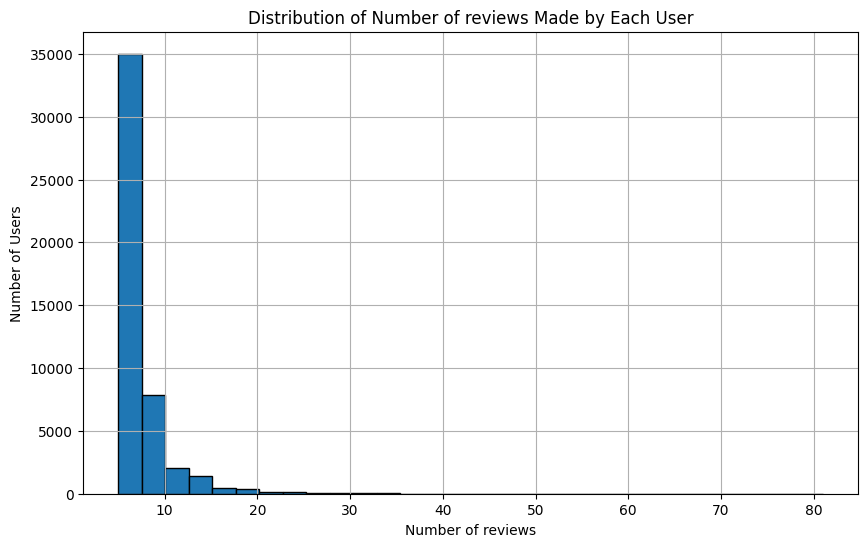

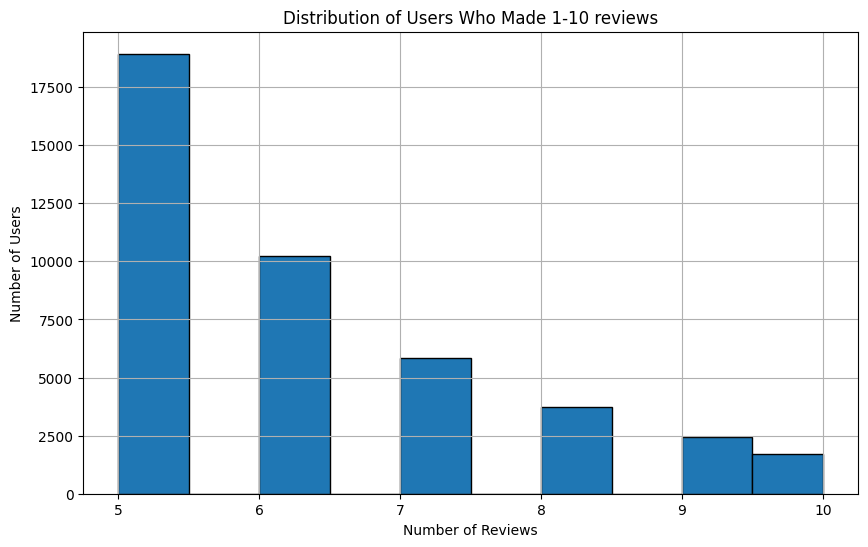

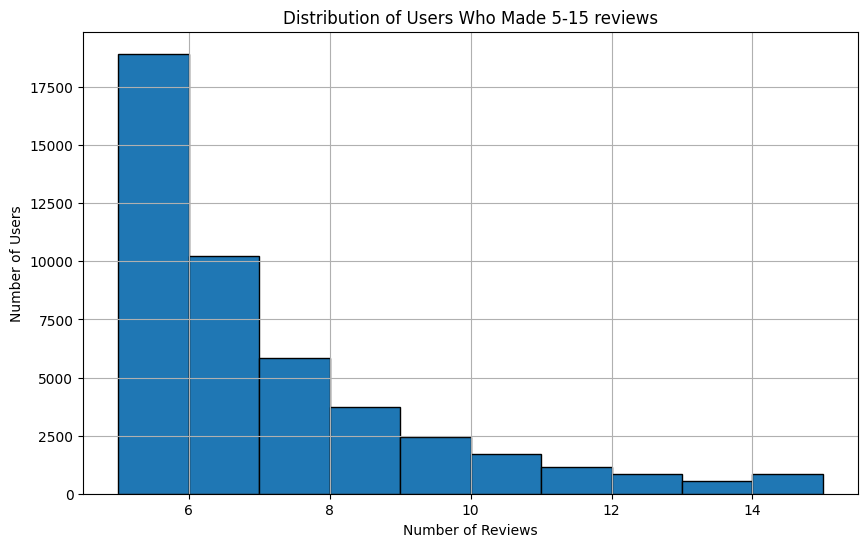

In [21]:
# Plot the distribution of number of reviews made by each user
user_total_reviews = user_reviews_frequency.groupby('customer_id')['monthly_reviews'].sum()
max_reviews = user_total_reviews.max()
print(f"Maximum number of reviews made by one user: {max_reviews}")

plt.figure(figsize=(10, 6))
plt.hist(user_total_reviews, bins=30, edgecolor='black')
plt.title('Distribution of Number of reviews Made by Each User')
plt.xlabel('Number of reviews')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Filter users who made between 1 and 10 reviews
filtered_reviews = user_total_reviews[(user_total_reviews >= 1) & (user_total_reviews <= 10)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_reviews, bins=10, edgecolor='black')
plt.title('Distribution of Users Who Made 1-10 reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Filter users who made between 5 and 15 reviews
filtered_reviews = user_total_reviews[(user_total_reviews >= 5) & (user_total_reviews <= 15)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_reviews, bins=10, edgecolor='black')
plt.title('Distribution of Users Who Made 5-15 reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

All 3 histograms shows the distribution of number of reviews made by the users across different ranges.

One similarity is that the distribution for all 3 histograms is right-skewed, with the largest group of users submitting around 5 reviews and progressively fewer users contribute to the higher counts across the different ranges.

This suggests that while a notable number of users are moderately active, only a small fraction continue reviewing consistently beyond a few interactions.

### Number of verified purchases made by each user

Maximum number of purchases made by one user: 81


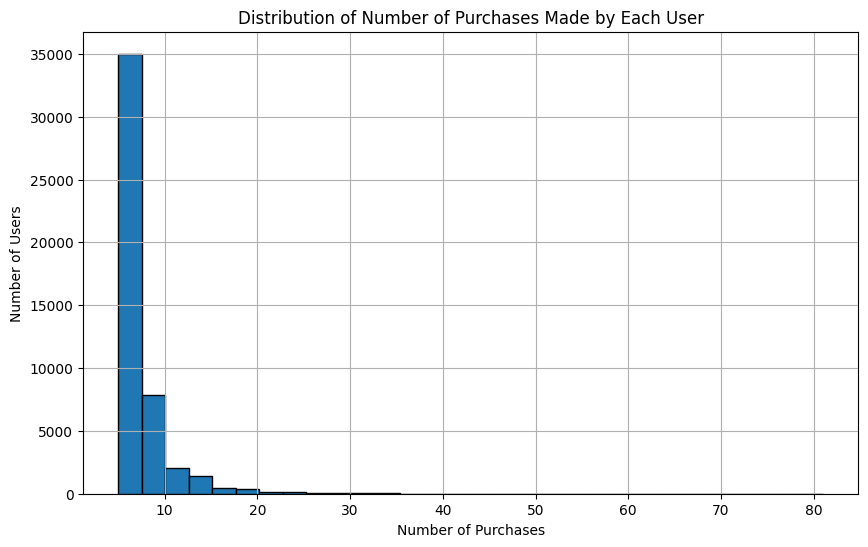

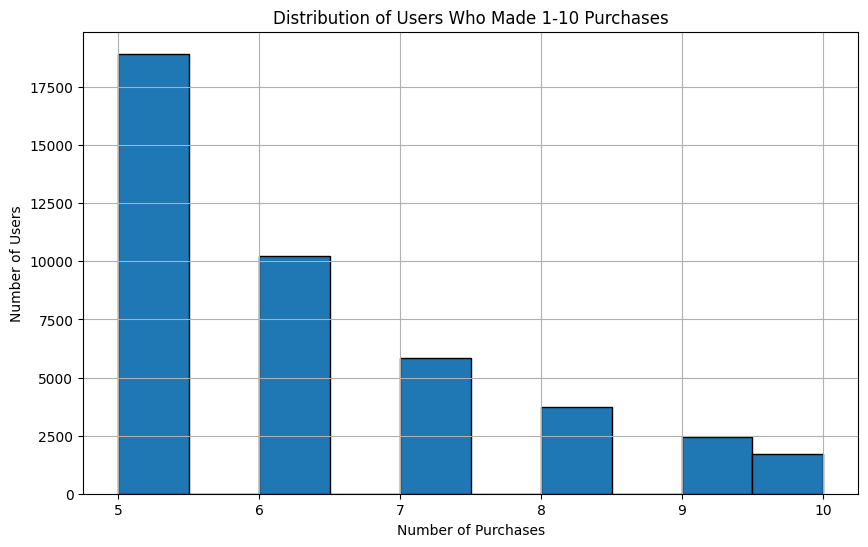

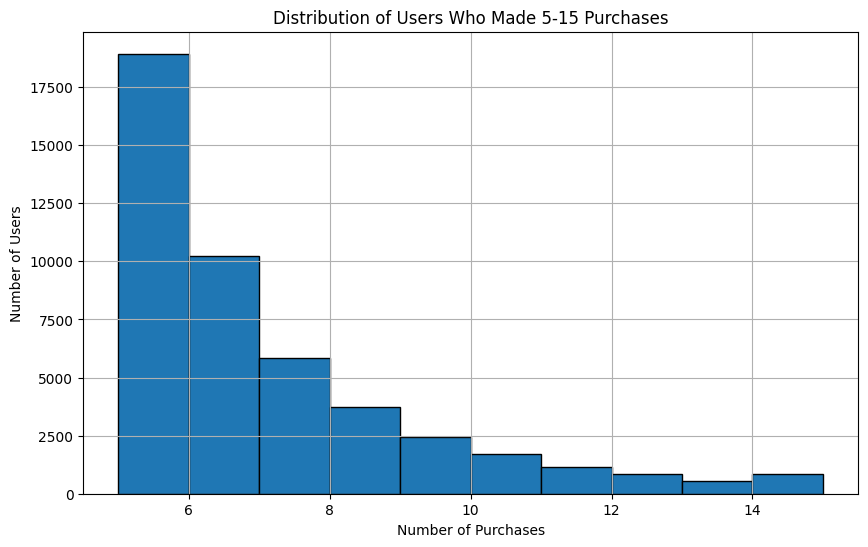

In [22]:
# Filter the dataset for verified purchases
df_verified_purchases = df_reviews[df_reviews['verified_purchase'] == 'Y']

user_total_purchases = df_verified_purchases.groupby('customer_id').size()
max_purchases = user_total_purchases.max()
print(f"Maximum number of purchases made by one user: {max_purchases}")

# Plot the distribution of the total number of purchases made by each user
plt.figure(figsize=(10, 6))
plt.hist(user_total_purchases, bins=30, edgecolor='black')
plt.title('Distribution of Number of Purchases Made by Each User')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Filter users who made between 1 and 10 purchases
filtered_purchases_1_10 = user_total_purchases[(user_total_purchases >= 1) & (user_total_purchases <= 10)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_purchases_1_10, bins=10, edgecolor='black')
plt.title('Distribution of Users Who Made 1-10 Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Filter users who made between 5 and 15 purchases
filtered_purchases_5_15 = user_total_purchases[(user_total_purchases >= 5) & (user_total_purchases <= 15)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_purchases_5_15, bins=10, edgecolor='black')
plt.title('Distribution of Users Who Made 5-15 Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


The distribution of the number of verified purchases made by each user is similar to that of the number of reviews made by each user.

### Number of Reviews made for each product

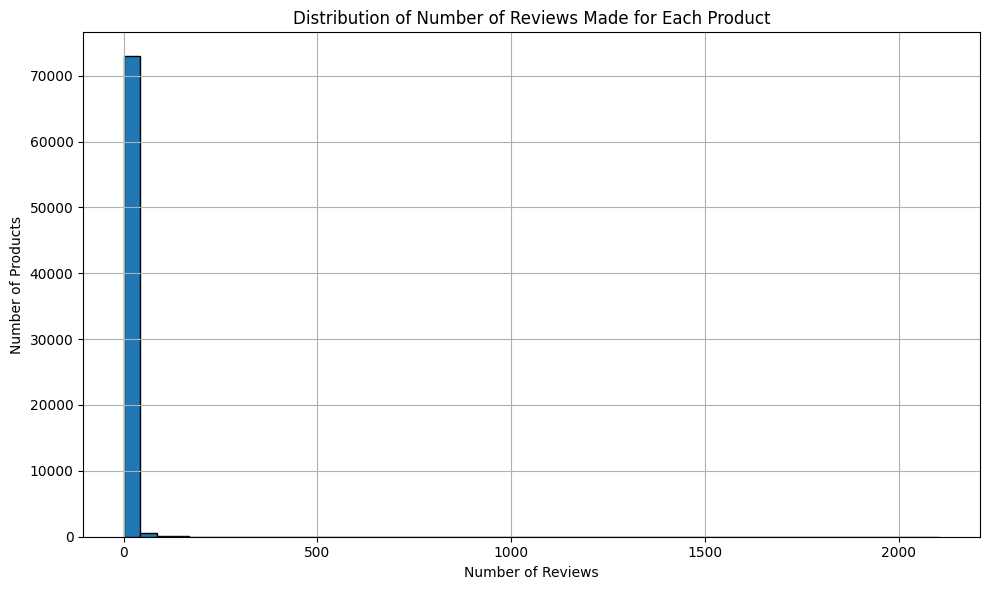

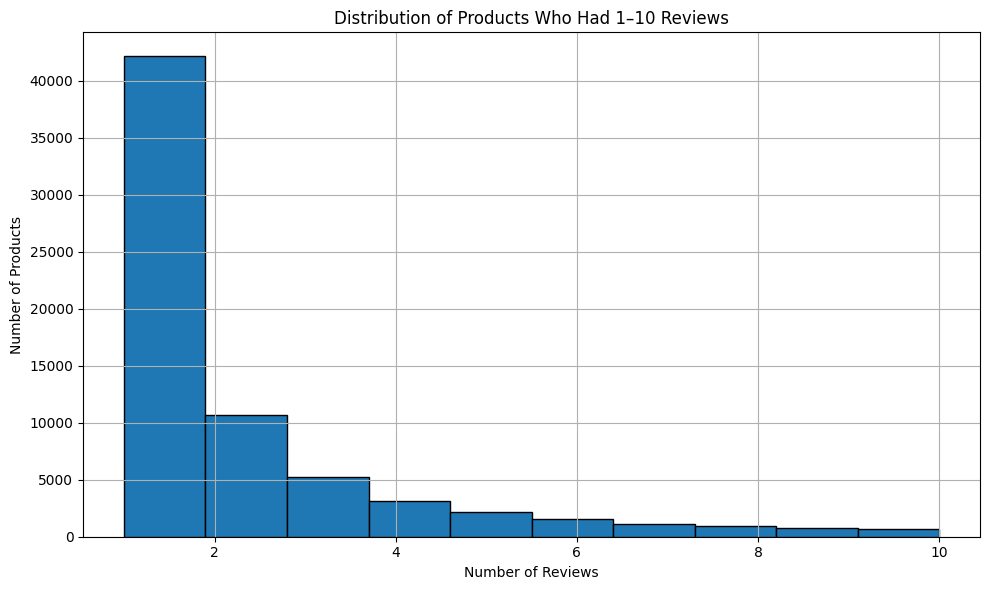

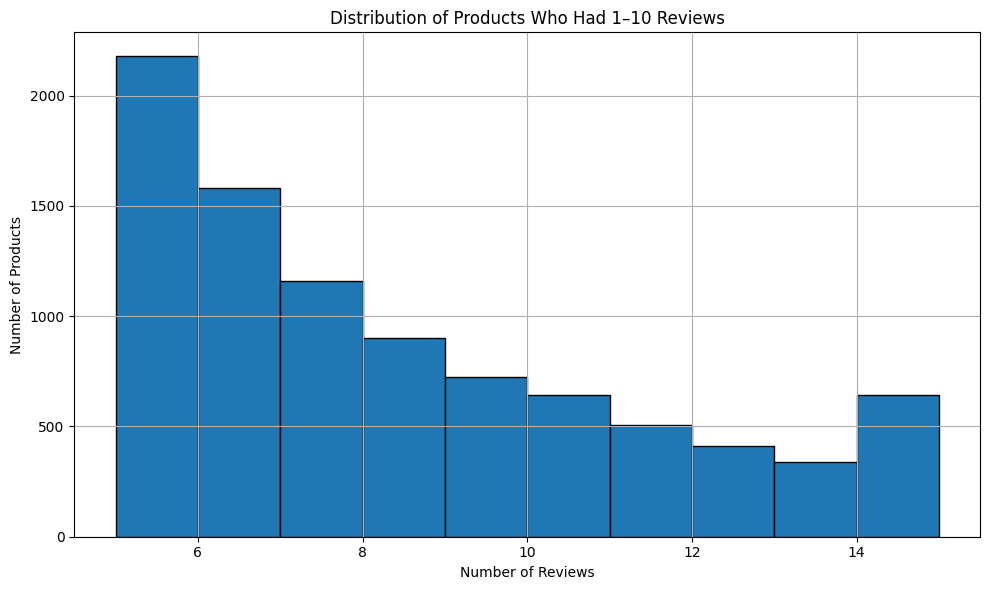

In [25]:
product_reviews_counts = df_reviews['product_id'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(product_reviews_counts, bins=50, edgecolor='black')
plt.title('Distribution of Number of Reviews Made for Each Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter products that had between 1 and 10 Reviews
filtered_counts = product_reviews_counts[product_reviews_counts.between(1, 10)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts, bins=10, edgecolor='black')
plt.title('Distribution of Products Who Had 1–10 Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter products that had between 5 and 15 Reviews
filtered_counts = product_reviews_counts[product_reviews_counts.between(5, 15)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts, bins=10, edgecolor='black')
plt.title('Distribution of Products Who Had 1–10 Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

All 3 histograms shows the distribution of number of reviews made for each product across different ranges.

One similarity is that the distribution for all 3 histograms is right-skewed, and the majority of products fall on the lower end of the respective ranges, with the highest concentration of products having around 5 reviews. As the number of reviews increases, the number of products sharply decreases, indicating that most products receive only a small number of reviews.

### Number of verified purchases made for each product

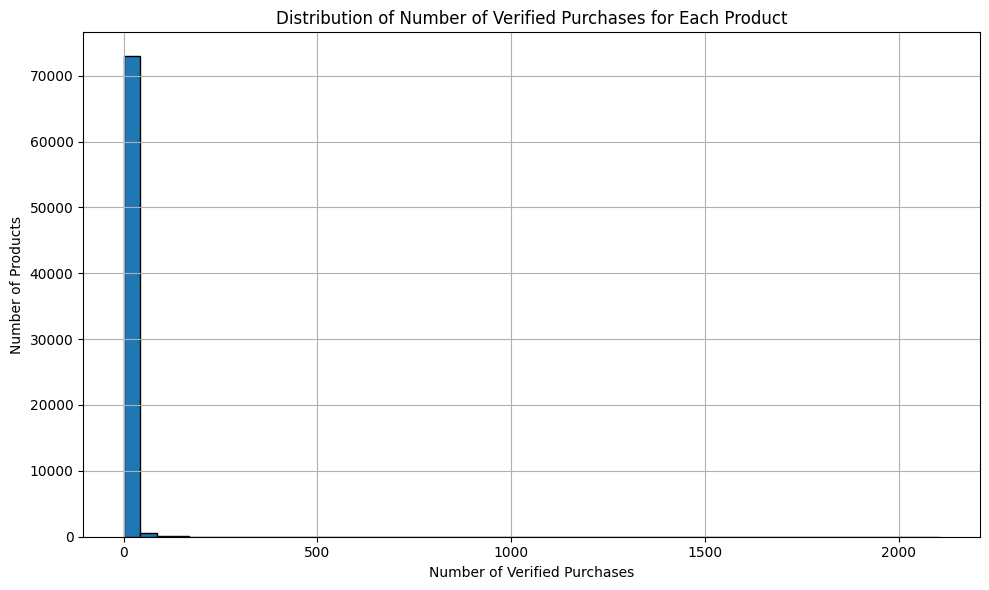

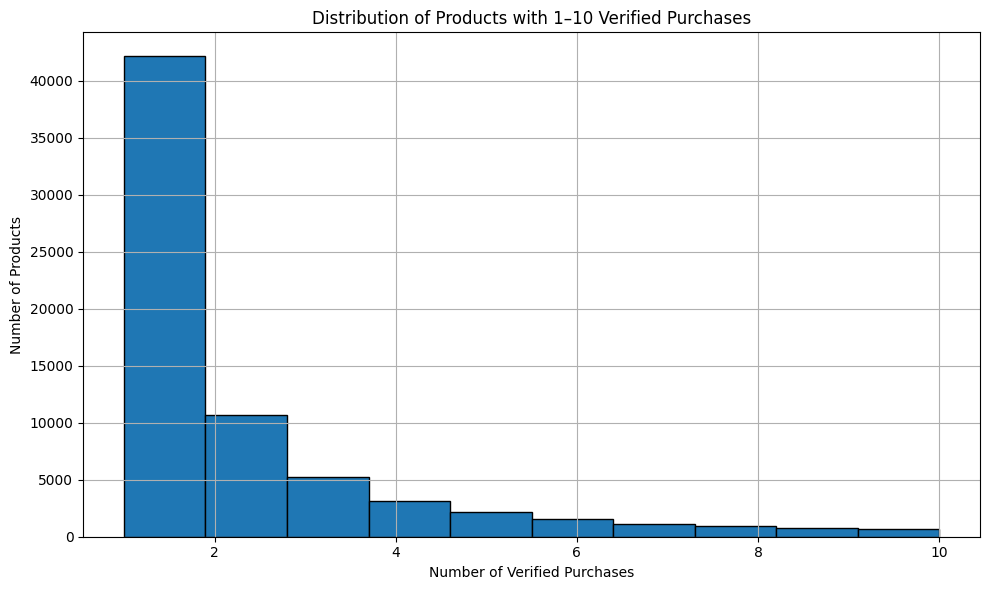

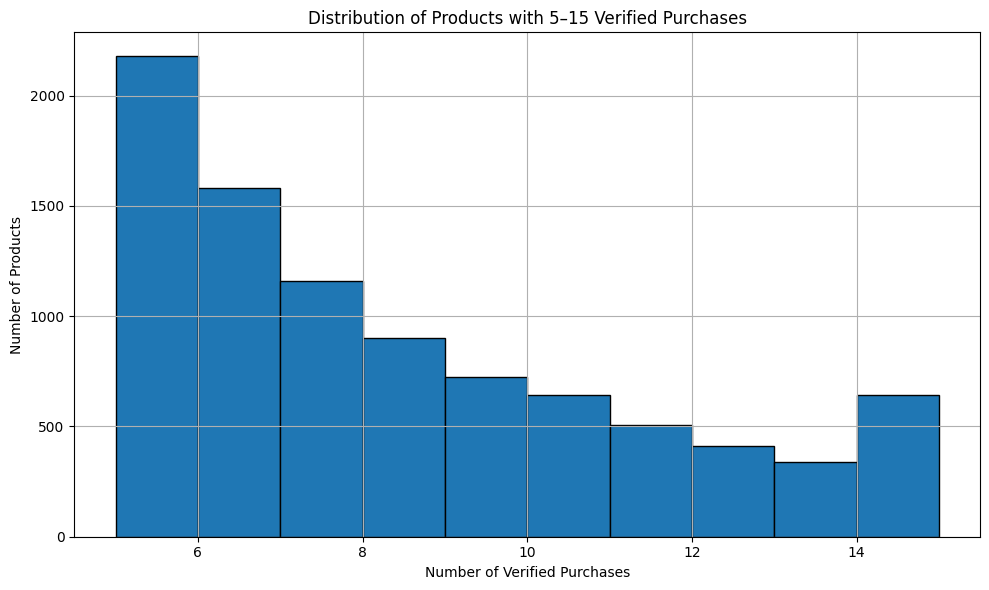

In [24]:
product_purchases_counts = df_verified_purchases['product_id'].value_counts()

# Plot the distribution of the number of verified purchases made for each product
plt.figure(figsize=(10, 6))
plt.hist(product_purchases_counts, bins=50, edgecolor='black')
plt.title('Distribution of Number of Verified Purchases for Each Product')
plt.xlabel('Number of Verified Purchases')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter products that had between 1 and 10 Verified Purchases
filtered_counts_1_10 = product_purchases_counts[product_purchases_counts.between(1, 10)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts_1_10, bins=10, edgecolor='black')
plt.title('Distribution of Products with 1–10 Verified Purchases')
plt.xlabel('Number of Verified Purchases')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter products that had between 5 and 15 Verified Purchases
filtered_counts_5_15 = product_purchases_counts[product_purchases_counts.between(5, 15)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts_5_15, bins=10, edgecolor='black')
plt.title('Distribution of Products with 5–15 Verified Purchases')
plt.xlabel('Number of Verified Purchases')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

The distribution of the number of verified purchases made for each product is similar to that of the number of reviews made for each product.

Number of users and products with at least 5 reviews and verified purchases

In [26]:
users_more_than_5_reviews = user_total_reviews[user_total_reviews >= 5].count()

products_more_than_5_reviews = product_reviews_counts[product_reviews_counts >= 5].count()

# Print the results
print(f"Number of users who made at least 5 reviews: {users_more_than_5_reviews}")
print(f"Number of products with at least 5 reviews: {products_more_than_5_reviews}")

Number of users who made at least 5 reviews: 47649
Number of products with at least 5 reviews: 12701


In [28]:
df_verified_purchases = df_reviews[df_reviews['verified_purchase'] == 'Y']

# Count the total number of verified purchases made by each user
user_total_purchases = df_verified_purchases.groupby('customer_id').size()
users_more_than_5_purchases = user_total_purchases[user_total_purchases >= 5].count()

# Count the number of verified purchases for each product
product_purchases_counts = df_verified_purchases['product_id'].value_counts()
products_more_than_5_purchases = product_purchases_counts[product_purchases_counts >= 5].count()

print(f"Number of users who made at least 5 verified purchases: {users_more_than_5_purchases}")
print(f"Number of products with at least 5 verified purchases: {products_more_than_5_purchases}")

Number of users who made at least 5 verified purchases: 47649
Number of products with at least 5 verified purchases: 12701


### Number of Users with at least 5 verified purchases over time

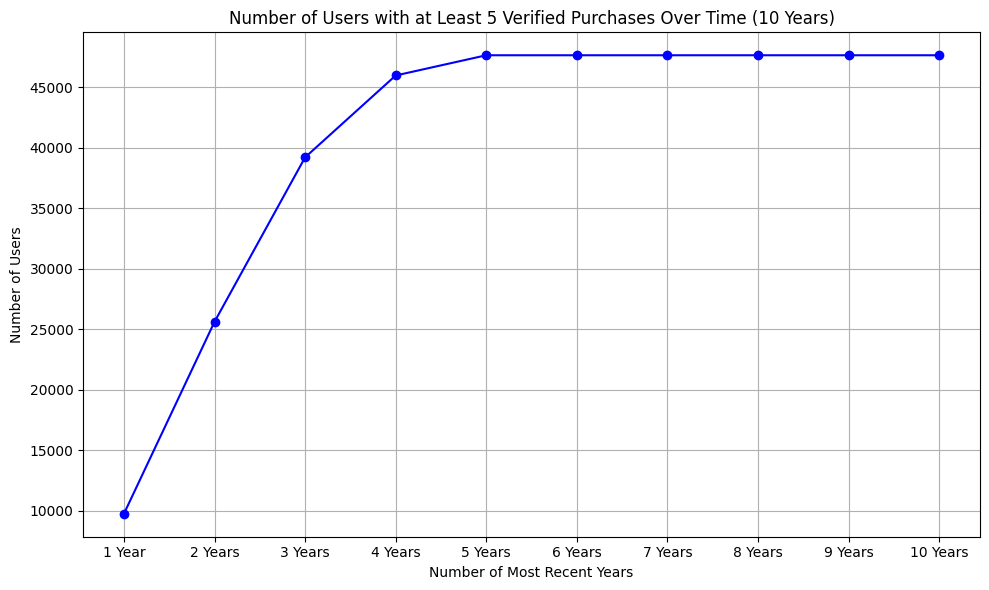

Number of users with at least 5 verified purchases in most recent 1 year(s): 9767
Number of users with at least 5 verified purchases in most recent 2 year(s): 25627
Number of users with at least 5 verified purchases in most recent 3 year(s): 39214
Number of users with at least 5 verified purchases in most recent 4 year(s): 45978
Number of users with at least 5 verified purchases in most recent 5 year(s): 47649
Number of users with at least 5 verified purchases in most recent 6 year(s): 47649
Number of users with at least 5 verified purchases in most recent 7 year(s): 47649
Number of users with at least 5 verified purchases in most recent 8 year(s): 47649
Number of users with at least 5 verified purchases in most recent 9 year(s): 47649
Number of users with at least 5 verified purchases in most recent 10 year(s): 47649


In [27]:
df_verified_purchases = df_reviews[df_reviews['verified_purchase'] == 'Y']
# Get the current year
current_year = df_verified_purchases['review_year'].max()

# Function to count users with at least 5 purchases for a given time period
def count_users_with_5_purchases_in_period(years_back):
    start_year = current_year - years_back + 1
    period_data = df_verified_purchases[df_verified_purchases['review_year'] >= start_year]

    # Count the total number of purchases made by each user
    user_total_purchases = period_data.groupby('customer_id').size()

    # Count the number of users who made at least 5 verified purchases
    users_more_than_5_purchases = user_total_purchases[user_total_purchases >= 5].count()

    return users_more_than_5_purchases

# List to store the number of users for each time period
users_count_per_period = []

# Calculate the number of users for the most recent 1 to 10 years
for years_back in range(1, 11):  # Most recent 1 to 10 years
    users_count_per_period.append(count_users_with_5_purchases_in_period(years_back))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), users_count_per_period, marker='o', linestyle='-', color='b')
plt.title('Number of Users with at Least 5 Verified Purchases Over Time (10 Years)')
plt.xlabel('Number of Most Recent Years')
plt.ylabel('Number of Users')
plt.xticks(range(1, 11), [f'{i} Year{"s" if i > 1 else ""}' for i in range(1, 11)])
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the results for each year
for years_back, count in zip(range(1, 11), users_count_per_period):
    print(f"Number of users with at least 5 verified purchases in most recent {years_back} year(s): {count}")


The line chart shows the number of users with at least 5 verified purchases, accumulated over the most recent 1 to 10 years.

The number of such users increases sharply in the first few years, indicating rapid accumulation of purchasing activity. However, the curve begins to plateau around the 5-year mark. Beyond 5 years, the user count stabilizes, indicating diminishing returns in identifying new qualifying users over longer time spans.

This trend suggests that focusing on recent user activity (within the last 5 years) is likely sufficient for segmenting customers in recommendation systems.

### Word Cloud from User Reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


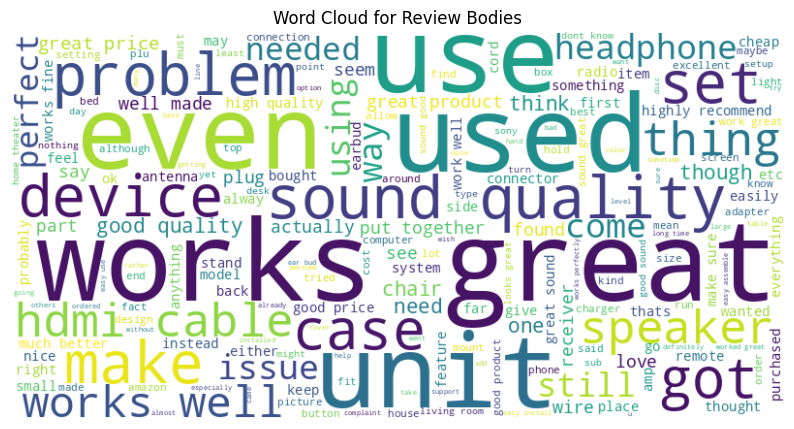

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    return ''  # Return an empty string if the text is NaN or not a string

df_reviews['cleaned_review_body'] = df_reviews['review_body'].apply(preprocess_text)

text_for_wordcloud = ' '.join(df_reviews['cleaned_review_body'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Bodies')
plt.show()

The word cloud visualizes the most frequently used terms in the review texts, offering insight into common themes and user sentiments.

Prominent words such as “great,” “works,” “used,” “sound,” and “quality” suggest that users often emphasize product performance and satisfaction.

Words like “problem,” “issue,” and “needed” also appear, indicating that while reviews are largely positive, users do occasionally highlight functional concerns.

The presence of specific terms like “hdmi,” “speaker,” and “device” reflects the product categories being discussed.

Overall, the word cloud captures a mix of usage experience and product evaluation which effectively summarises user opinions.